---
# <center>
# <center> **PSI5790 - Aprendizado Profundo para Visão Computacional**
## <center> **Aula 03 - Exercícios**
---

## <center> **Jones Egydio**

---

# **Setup Python**


In [82]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

A linha `from PIL import Image` é uma instrução de importação em Python que carrega a classe `Image` do módulo PIL, que é um acrônimo para Python Imaging Library, mais recentemente conhecida como Pillow. Pillow é uma biblioteca de manipulação de imagens que adiciona suporte para abrir, manipular e salvar muitos formatos de arquivos de imagem diferentes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ex01**

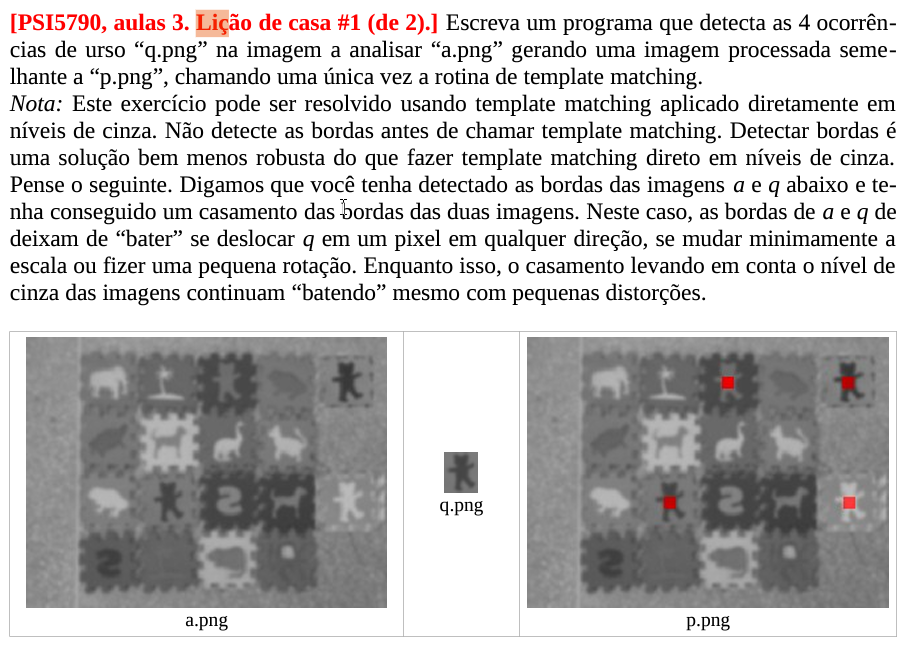

#### **Versão 1**

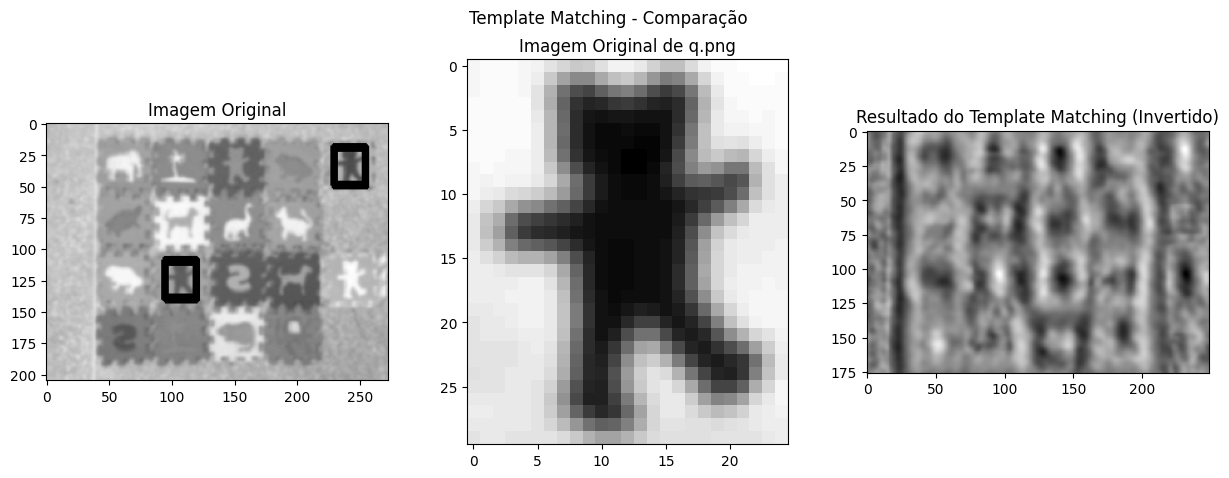

In [ ]:
def template_matching_and_visualization(a_img_path, q_img_path):
    # Carregar imagens
    a_img = cv2.imread(a_img_path, 0)  # 0 to read image in grayscale
    q_img = cv2.imread(q_img_path, 0)  # 0 to read image in grayscale

    # Inverter a imagem "q_img"
    q_img_inverted = cv2.flip(q_img, -1)

    # Template matching com a imagem original de q.png
    result_original = cv2.matchTemplate(a_img, q_img, cv2.TM_CCOEFF_NORMED)

    # Template matching com a imagem invertida de q.png
    result_inverted = cv2.matchTemplate(a_img, q_img_inverted, cv2.TM_CCOEFF_NORMED)

    # Determinar os locais com um limite
    threshold = 0.8
    locations_original = np.where(result_original >= threshold)
    locations_original = list(zip(*locations_original[::-1]))  # Swap the x and y coordinates and make a list of coordinates

    locations_inverted = np.where(result_inverted >= threshold)
    locations_inverted = list(zip(*locations_inverted[::-1]))  # Swap the x and y coordinates and make a list of coordinates

    # Visualizar os resultados
    plt.figure(figsize=(15, 5))

    # Exibir a imagem original com as localizações do template (q.png)
    plt.subplot(1, 3, 1)
    plt.imshow(a_img, cmap='gray')
    plt.title('Imagem Original')
    # Marcar as detecções na imagem
    for loc in locations_original:
        cv2.rectangle(a_img, loc, (loc[0] + q_img.shape[1], loc[1] + q_img.shape[0]), (0, 0, 255), 2)
    plt.imshow(a_img, cmap='gray')

    # Exibir a imagem original de q.png
    plt.subplot(1, 3, 2)
    plt.imshow(q_img, cmap='gray')
    plt.title('Imagem Original de q.png')

    # Exibir o resultado do template matching com a imagem invertida de q.png
    plt.subplot(1, 3, 3)
    plt.imshow(result_inverted, cmap='gray')
    plt.title('Resultado do Template Matching (Invertido)')

    # Mostrar os plots
    plt.suptitle('Template Matching - Comparação')
    plt.show()

# Caminhos das imagens
a_img_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/a.png'
q_img_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/q.png'

# Realizar o template matching e visualizar os resultados
template_matching_and_visualization(a_img_path, q_img_path)


#### **Versão 2**

Contorno correspondente encontrado.


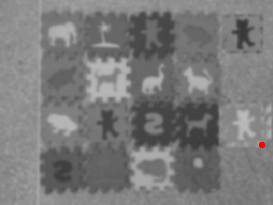

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def find_and_compare_contours_improved(target_image_path, query_image_path):
    # Carregar as imagens
    target_image = cv2.imread(target_image_path, 0)
    query_image = cv2.imread(query_image_path, 0)

    # Verificar se as imagens foram carregadas corretamente
    if target_image is None or query_image is None:
        return "Erro: uma das imagens não foi carregada corretamente.", None

    # Aplicar blur para reduzir ruído e facilitar a detecção de bordas
    target_blurred = cv2.GaussianBlur(target_image, (5, 5), 0)
    query_blurred = cv2.GaussianBlur(query_image, (5, 5), 0)

    # Detectar bordas usando Canny com parâmetros menos restritivos
    target_edges = cv2.Canny(target_blurred, 30, 100)
    query_edges = cv2.Canny(query_blurred, 30, 100)

    # Encontrar contornos nas imagens processadas
    contours_target, _ = cv2.findContours(target_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours_query, _ = cv2.findContours(query_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Checar se contornos foram encontrados na imagem de consulta
    if not contours_query:
        return "Erro: nenhum contorno encontrado na imagem de consulta.", None

    # Encontrar o maior contorno na imagem de consulta
    query_contour = max(contours_query, key=cv2.contourArea)

    # Inicializar variáveis para a correspondência de contornos
    min_distance = float('inf')
    matching_contour = None

    # Comparar os contornos da imagem alvo com o contorno da imagem de consulta
    for contour in contours_target:
        distance = cv2.matchShapes(query_contour, contour, 1, 0.0)
        if distance < min_distance:
            min_distance = distance
            matching_contour = contour

    # Se nenhum contorno correspondente for encontrado, retorna uma mensagem
    if matching_contour is None:
        return "Erro: nenhum contorno correspondente foi encontrado.", None

    # Desenhar o contorno correspondente na imagem alvo
    matching_image = cv2.cvtColor(target_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(matching_image, [matching_contour], -1, (0, 255, 0), 2)

    # Encontrar o retângulo de contorno mínimo para o contorno correspondente e desenhar
    x, y, w, h = cv2.boundingRect(matching_contour)
    cv2.rectangle(matching_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    return "Contorno correspondente encontrado.", matching_image

# Caminhos das imagens ajustados conforme fornecido
target_image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/a.png'
query_image_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/q.png'

# Chamada à função ajustada para encontrar e comparar contornos
message, result_image = find_and_compare_contours_improved(target_image_path, query_image_path)

if result_image is not None:
    print(message)
    cv2_imshow(result_image)
else:
    print(message)


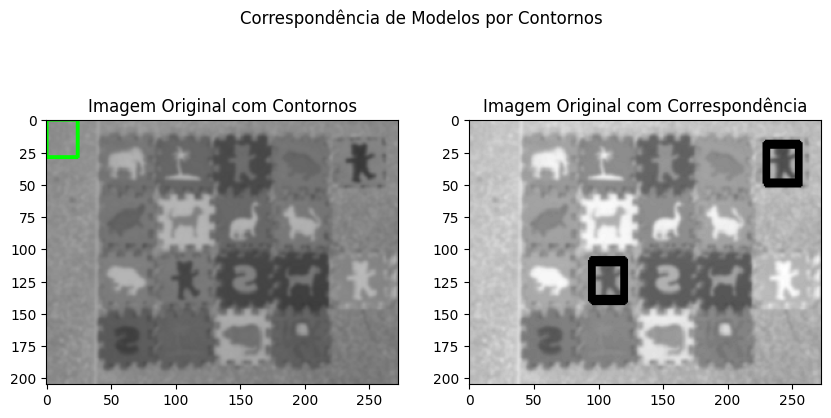

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagens
a_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/a.png', 0) # 0 to read image in grayscale
q_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/q.png', 0) # 0 to read image in grayscale

# Encontrar contornos na imagem q.png
q_contours, _ = cv2.findContours(q_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializar lista para armazenar locais de correspondência
locations = []

# Iterar sobre cada contorno encontrado
for contour in q_contours:
    # Calcular o retângulo delimitador para o contorno
    x, y, w, h = cv2.boundingRect(contour)
    # Realizar correspondência de modelos para cada contorno na imagem a.png
    result = cv2.matchTemplate(a_img, q_img[y:y+h, x:x+w], cv2.TM_CCOEFF_NORMED)
    # Determinar locais com um limite
    threshold = 0.8
    loc = np.where(result >= threshold)
    # Adicionar os locais encontrados na imagem original
    for pt in zip(*loc[::-1]):
        locations.append((pt[0], pt[1], w, h))

# Visualize os resultados
plt.figure(figsize=(10, 5))

# Exibir a imagem original com os contornos
plt.subplot(1, 2, 1)
a_img_contours = cv2.cvtColor(a_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(a_img_contours, q_contours, -1, (0, 255, 0), 2)
plt.imshow(a_img_contours)
plt.title('Imagem Original com Contornos')

# Exibir o resultado da correspondência de modelos
plt.subplot(1, 2, 2)
plt.imshow(a_img, cmap='gray')
plt.title('Imagem Original com Correspondência')
# Marcar as detecções na imagem
for loc in locations:
    cv2.rectangle(a_img, (loc[0], loc[1]), (loc[0] + loc[2], loc[1] + loc[3]), (0, 0, 255), 2)
plt.imshow(a_img, cmap='gray')

# Mostrar os plots
plt.suptitle('Correspondência de Modelos por Contornos')
plt.show()


---

## **Ex02**

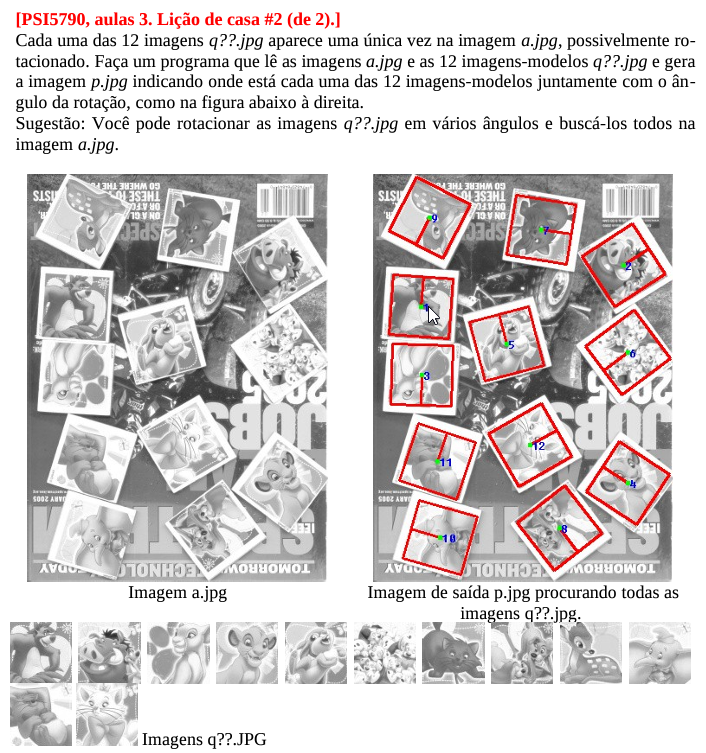

Caminho para a imagem de entrada: /content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/a1.jpg
Imagem de saída salva em: /content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]/p.jpg


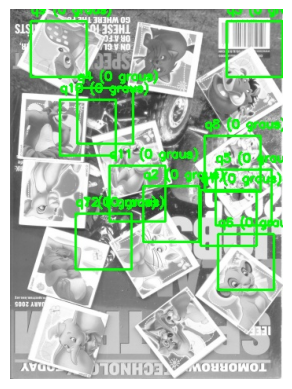

In [83]:
def find_object(image, template):
    """Encontra o objeto modelo na imagem usando correspondência de características."""
    orb = cv2.ORB_create()

    # Detecta keypoints e computa descritores para a imagem de entrada e o modelo
    keypoints_image, descriptors_image = orb.detectAndCompute(image, None)
    keypoints_template, descriptors_template = orb.detectAndCompute(template, None)

    # Configura o matcher de correspondência
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Faz a correspondência dos descritores entre a imagem de entrada e o modelo
    matches = matcher.match(descriptors_template, descriptors_image)

    # Ordena os matches pela distância
    matches = sorted(matches, key=lambda x: x.distance)

    # Retorna a posição do objeto encontrado na imagem de entrada
    if len(matches) > 0:
        return keypoints_image[matches[0].trainIdx].pt, keypoints_template, keypoints_image
    else:
        return None, None, None

def main():
    # Pasta contendo as imagens
    folder_path = '/content/drive/MyDrive/Colab Notebooks/_phd/[ 2024 - PSI5790 ]/[ Aula 03 ]'

    # Verifica se a pasta existe
    if not os.path.exists(folder_path):
        print("Erro: Pasta não encontrada.")
        return

    # Carrega a imagem de entrada
    image_path = os.path.join(folder_path, 'a1.jpg')
    print("Caminho para a imagem de entrada:", image_path)
    image = cv2.imread(image_path, 0)  # Carrega como escala de cinza
    if image is None:
        print("Erro: Não foi possível carregar a imagem de entrada.")
        return

    # Inicializa a lista de imagens-modelo
    templates = []
    for i in range(1, 13):
        template_path = os.path.join(folder_path, f'q{i}.jpg')
        template = cv2.imread(template_path, 0)  # Carrega como escala de cinza
        if template is None:
            print(f"Erro: Não foi possível carregar a imagem modelo q{i}.jpg")
            continue
        templates.append(template)

    # Configurações de rotação
    angles = list(range(0, 360, 10))  # Rotação em incrementos de 10 graus

    # Inicializa a imagem de saída
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Para cada imagem-modelo
    for idx, template in enumerate(templates, start=1):
        # Para cada ângulo de rotação
        best_match = None
        best_angle = None
        best_location = None
        for angle in angles:
            # Rotaciona a imagem-modelo
            rotated_template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)

            # Procura o objeto na imagem de entrada
            location, keypoints_template, keypoints_image = find_object(image, rotated_template)

            if location is not None:
                best_match = rotated_template
                best_angle = angle
                best_location = location
                break

        # Se encontrar o objeto, desenha um retângulo ao redor dele na imagem de saída
        if best_match is not None:
            h, w = best_match.shape
            pt1 = (int(best_location[0] - w / 2), int(best_location[1] - h / 2))
            pt2 = (int(best_location[0] + w / 2), int(best_location[1] + h / 2))
            cv2.rectangle(output_image, pt1, pt2, (0, 255, 0), 2)
            cv2.putText(output_image, f'q{idx} ({best_angle} graus)', (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Salva a imagem de saída
    output_path = os.path.join(folder_path, 'p.jpg')
    cv2.imwrite(output_path, output_image)
    print("Imagem de saída salva em:", output_path)

    # Exibe a imagem p.jpg
    p_image = cv2.imread(output_path)
    if p_image is not None:
        plt.imshow(cv2.cvtColor(p_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("Erro: Não foi possível carregar a imagem p.jpg.")

if __name__ == "__main__":
    main()
